In [2]:
from deepface import DeepFace
import matplotlib.pyplot as plt
import cv2


In [3]:
from deepface import DeepFace
import cv2 as cv
cap = cv.VideoCapture(0)
if not cap.isOpened():
    print("camera open failed")
    exit()
while True:
    ret, img = cap.read()
    if not ret:
        print("Can;t read camera")
        break
        
    cv.imshow('PC_camera', img)
    if cv.waitKey(1) == ord('c'):
        img_captured = cv.imwrite('img_captured.png', img)
        try:
            result = DeepFace.find(img_path="img_captured.png", db_path="face-db/", silent=True)
            print(result)
        except:
            print("face couldn't be detected")
            pass
    if cv.waitKey(1) == ord('q'):
        break

        
cap.release()
cv.destroyAllWindows()

face couldn't be detected
[          identity  source_x  source_y  source_w  source_h  VGG-Face_cosine
0  face-db//n9.jpg       232       279        72        72         0.264519,                identity  source_x  source_y  source_w  source_h  \
0       face-db//n1.jpg       214       208       184       184   
1       face-db//n2.jpg       214       208       184       184   
2       face-db//n8.jpg       214       208       184       184   
3       face-db//n3.jpg       214       208       184       184   
4       face-db//n6.jpg       214       208       184       184   
5      face-db//n11.jpg       214       208       184       184   
6   face-db/me/me-2.jpg       214       208       184       184   
7       face-db//n5.jpg       214       208       184       184   
8       face-db//n4.jpg       214       208       184       184   
9   face-db/me/me-3.jpg       214       208       184       184   
10  face-db/me/me-4.jpg       214       208       184       184   
11      face-db/

In [5]:
        result  = DeepFace.verify(img1_path = "img_captured.png",
                         img2_path = "face-db/jung/jung-2.jpg",
                         model_name = "VGG-Face")
        print(result)

{'verified': False, 'distance': 0.6093928004159216, 'threshold': 0.4, 'model': 'VGG-Face', 'detector_backend': 'opencv', 'similarity_metric': 'cosine', 'facial_areas': {'img1': {'x': 271, 'y': 205, 'w': 164, 'h': 164}, 'img2': {'x': 562, 'y': 129, 'w': 138, 'h': 138}}, 'time': 0.92}


In [30]:
result = DeepFace.find(img_path="img_captured.png", db_path="face-db/", enforce_detection=False)
result

There are  37  representations found in  representations_vgg_face.pkl
find function lasts  0.2339949607849121  seconds


[                           identity  source_x  source_y  source_w  source_h  \
 0  face-db/20200500/20200500_09.jpg         0         0       640       480   
 1  face-db/20200500/20200500_15.jpg         0         0       640       480   
 
    VGG-Face_cosine  
 0         0.387148  
 1         0.394450  ]

In [56]:
result = DeepFace.find(img_path="img_captured.png", db_path="face-db/")
print(type(result))
print(result[0])

Finding representations: 100%|█████████████████████████████████████████████████████████| 31/31 [00:08<00:00,  3.67it/s]


Representations stored in face-db//representations_vgg_face.pkl file.Please delete this file when you add new identities in your database.
find function lasts  9.055646419525146  seconds
<class 'list'>
Empty DataFrame
Columns: [identity, source_x, source_y, source_w, source_h, VGG-Face_cosine]
Index: []


In [41]:
string = result[0]
print(type(string))
print(type(string['identity'].to_string()))
real_one = string['identity'].to_string()

print(real_one)

<class 'pandas.core.frame.DataFrame'>
<class 'str'>
0    face-db//n9.jpg


In [6]:
pd_data = result[0]
real_two =  pd_data.at[0, 'identity']
print(type(pd_data.at[0, 'identity']))
print(real_two)

<class 'str'>
face-db//n9.jpg


str을 전처리 해야하는데 굳이 그럴 필요 없이 폴더이름으로 학번을 넣거나 사진이름으로 학번을 넣어서 
if '20200500' in real_two:
와 같이 맞다면 넣는걸로 해보자.

### 얼굴에 네모 가두기 하는 거 실험

In [4]:


from deepface import DeepFace
import cv2 as cv




faces=[]
cap = cv.VideoCapture(0)
if not cap.isOpened():
    print("camera open failed")
    exit()
while True:
    ret, img = cap.read()
    if not ret:
        print("Can;t read camera")
        break
        

    if cv.waitKey(1) == ord('c'):
        img_captured = cv.imwrite('img_captured.png', img)
        
        
        raw_img = img.copy()
        resolution_x = img.shape[1]
        resolution_y = img.shape[0]
        try:
            # just extract the regions to highlight in webcam
            face_objs = DeepFace.extract_faces(
                img_path=img,
                detector_backend="opencv",
                enforce_detection=False,
            )
            print("try successed")
            faces = []
            for face_obj in face_objs:
                facial_area = face_obj["facial_area"]
                faces.append(
                    (
                        facial_area["x"],
                        facial_area["y"],
                        facial_area["w"],
                        facial_area["h"],
                    )
                )
            print(faces)
            
        except:  # to avoid exception if no face detected
            faces = []
            print("try failed")

    for x, y, w, h in faces:
        if w > 130:  # discard small detected faces
            cv.rectangle(
                img, (x, y), (x + w, y + h), (144, 238, 144), 1
            )  # draw rectangle to main image
    cv.imshow('PC_camera', img)


        
        
    if cv.waitKey(1) == ord('q'):
        break

cap.release()
cv.destroyAllWindows()

try successed
[(178, 52, 240, 240)]
try successed
[(195, 72, 249, 249)]
try successed
[(192, 66, 260, 260)]
try successed
[(225, 35, 261, 261)]
try successed
[(247, 31, 262, 262)]
try successed
[(231, 37, 249, 249), (303, 366, 27, 27)]
try successed
[(186, 43, 246, 246)]
try successed
[(109, 57, 262, 262)]
try successed
[(110, 68, 257, 257)]


In [11]:
face_objs = DeepFace.extract_faces(
                img_path="img_captured.png",
                detector_backend="opencv",
                enforce_detection=False,
            )
faces = []
for face_obj in face_objs:
    facial_area = face_obj["facial_area"]
    faces.append(
        (
            facial_area["x"],
            facial_area["y"],
            facial_area["w"],
            facial_area["h"],
        )
    )
print(faces)

[(191, 265, 193, 193)]


In [15]:
from deepface import DeepFace
import cv2 as cv
cap = cv.VideoCapture(0)
if not cap.isOpened():
    print("camera open failed")
    exit()
while True:
    ret, img = cap.read()
    if not ret:
        print("Can;t read camera")
        break
        
    
    if cv.waitKey(1) == ord('c'):
        img_captured = cv.imwrite('img_captured.png', img)
        try:
            result = DeepFace.find(img_path="img_captured.png", db_path="face-db/", silent=True)
            print(result)
        except:
            print("face couldn't be detected")
            pass
    if cv.waitKey(1) == ord('q'):
        break
    cv.rectangle(
        img, (100,100), (300,300), (0, 255, 0), 3
        )  # draw rectangle to main image
    cv.imshow('PC_camera', img)
        
cap.release()
cv.destroyAllWindows()

face couldn't be detected


### 얼굴에 detect한 얼굴 파일 뜨게 하는거 실험

In [5]:
from deepface import DeepFace
import cv2 as cv
import matplotlib.pyplot as plt

pivot_img_size = 112

x = 610
y = 30

text_color = (255,255,255)


cap = cv.VideoCapture(0)
pivot_img_size = 112

result = 0
matching_img = 0
display_img = None
label = None


if not cap.isOpened():
    print("camera open failed")
    exit()
while True:
    ret, img = cap.read()
    label = None
    if not ret:
        print("Can;t read camera")
        break
        
    if display_img is not None:
        img[
            y : y + pivot_img_size,
            x - pivot_img_size  : x,
        ] = display_img
        
        cv.rectangle(
            img,
            (x - pivot_img_size , y + pivot_img_size),
            (x, y + pivot_img_size + 20),
            (46, 200, 255),
            cv.FILLED,
        )
        
        cv.putText(
            img,
            label,
            (x - pivot_img_size , y + pivot_img_size + 15),
            cv.FONT_HERSHEY_SIMPLEX,
            0.5,
            text_color,
            1,
        )
        
    
    if cv.waitKey(1) == ord('c'):
        img_captured = cv.imwrite('img_captured.png', img)
        try:
            result = DeepFace.find(
                img_path="img_captured.png", 
                db_path="face-db/", 
                silent=True
            )
            pd_data = result[0]
            matching_image =  pd_data.at[0, 'identity']
            source_objs = DeepFace.extract_faces(
                img_path=matching_image,
                target_size=(pivot_img_size, pivot_img_size),
                detector_backend="opencv",
                enforce_detection=False,
                align=False,
            )
            
            

            source_obj = source_objs[0]
            display_img = source_obj['face']
            display_img *= 255
            display_img = display_img[:, :, ::-1]
            
            label = matching_image.split("/")[-1][:-7]
            print(label)
             
            
            
            
        except:
            print("face couldn't be detected")
            display_img = None
            pass
    if cv.waitKey(1) == ord('q'):
        break
        

    cv.imshow('PC_camera', img)
        
cap.release()
cv.destroyAllWindows()

face couldn't be detected
20200500
20200500
face couldn't be detected
face couldn't be detected
face couldn't be detected
20200500
20200500


[:, :, ::-1]
을 하는이유 RGB의 형식을 CV2에서는 BGR을 사용하기 때문에 이를 위해 순서를 바꿔주는거임
::-1 == 거꾸로

255를 곱하는것도 비슷한 이유일듯 하다


This is numpy-specific and will not work for most python objects. The : means "take everything in this dimension" and the ::-1 means "take everything in this dimension but backwards." Your matrix has three dimensions: height, width and color. Here you're flipping the color from BGR to RGB. This is necessary because OpenCV has colors in BGR (blue/green/red) order, while most other imaging libraries have them in RGB order. This code will switch the image from OpenCV format to whatever format you'll display it in.



In [59]:
result = DeepFace.find(img_path="img_captured.png", db_path="face-db/", silent=True)
print(result[0].at[0, 'identity'])
pd_data = result[0]
matching_image =  pd_data.at[0, 'identity']
print(type(pd_data.at[0, 'identity']))
print(matching_image)

face-db/20200500/20200500_01.jpg
<class 'str'>
face-db/20200500/20200500_01.jpg


In [17]:
print(result[0])

                           identity  source_x  source_y  source_w  source_h  \
0  face-db/20200500/20200500_09.jpg        54       405        68        68   

   VGG-Face_cosine  
0         0.192144  


우선 일치하는 이미지의 얼굴을 추출해보자 (위 실행 필수)

In [4]:
from deepface import DeepFace
import matplotlib.pyplot as plt

pivot_img_size = 112

source_objs = DeepFace.extract_faces(
    img_path=matching_image,
    target_size=(pivot_img_size, pivot_img_size),
    detector_backend="opencv",
    enforce_detection=False,
    align=False,
)


source_obj = source_objs[0]
display_img = source_obj['face']


print("source", source_objs[0]['face'])
print("display", display_img)


plt.imshow(display_img)

NameError: name 'matching_image' is not defined

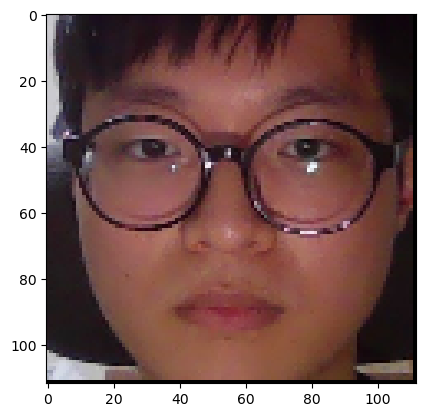

In [12]:
plt.imshow(display_img)

### MYSQL에 저장시켜보자

In [ ]:
import pymysql
import os


conn = pymysql.connect(
    host = "localhost",
    user = "root",
    password = "",
    db = "pythondb",
    charset= "utf8"
)

알코올, 입냄새 센서 제외하고 db에 넣기

In [5]:
from deepface import DeepFace
import cv2 as cv
import matplotlib.pyplot as plt
import pandas as pd
import pymysql
from datetime import datetime

# db에 연결할 기본적인 코드들
conn = pymysql.connect(host='localhost', user='root', password = '', db='pythondb')

cur = conn.cursor()

# 오른쪽 위에 일치하는 그림의 사이즈를 뜻함
pivot_img_size = 112

# 일치하는 그림의 위치 변수
x = 610
y = 30


text_color = (255,255,255)

# 동영상 촬영 시작
cap = cv.VideoCapture(0)
pivot_img_size = 112

# while내에 쓰일 변수들을 전역변수로
result = 0
matching_img = 0
display_img = None
label = None

# 동영상이 열리지 않는다면
if not cap.isOpened():
    print("camera open failed")
    exit()
    
# 동영상이 열렸다면 아래 코드를 무한 반복(Q입력 전까지) C입력시 캡쳐
while True:
    # 이미지를 읽는다.
    ret, img = cap.read()
    
    #나중을 위해 그냥 이미지만을 복사한다.
    raw_img = img.copy()
    
    # ret은 이미지가 읽어졌는지의 여부를 반환한다.
    if not ret:
        print("Can;t read camera")
        break
        
    # 후에 카메라에 있는 얼굴과 일치하는 얼굴이 있다면 display_img에 들어간다.
    if display_img is not None:
        # 이미지 배치
        img[
            y : y + pivot_img_size,
            x - pivot_img_size  : x,
        ] = display_img
        
        # 사각형 배치(위에 글자 올리려고)
        cv.rectangle(
            img,
            (x - pivot_img_size , y + pivot_img_size),
            (x, y + pivot_img_size + 20),
            (46, 200, 255),
            cv.FILLED,
        )
        
        # 글자 배치(사각형 위에)
        cv.putText(
            img,
            label,
            (x - pivot_img_size , y + pivot_img_size + 15),
            cv.FONT_HERSHEY_SIMPLEX,
            0.5,
            text_color,
            1,
        )
        
    
    
    # C를 눌러야만 캡쳐가 된다.
    if cv.waitKey(1) == ord('c'):
        
        # 쳐된 이미지를 저장한다. (뭘 반환하는지는 잘 모름)
        img_captured = cv.imwrite('img_captured.png', img)
        
        # 현재 시간을 저장한다.
        now = datetime.now()
        # 파일명으로 : 는 들어갈 수 없으므로 시간은 _로 나누어준다.
        now_db = now.strftime('%Y-%m-%d %H:%M:%S')
        now_str = now.strftime('%Y-%m-%d %H_%M_%S')
        
        # 해보고 안되면 face를 찾을 수 없다는 뜻
        try:
            # 현재 카메라의 얼굴과 face-db폴더 내부의 얼굴을 비교해서 결과값을 반환
            result = DeepFace.find(
                img_path=raw_img, 
                db_path="face-db/", 
                silent=True
            )
            
            # 가장 일치하는 값은 배열의 0번째에 pandas형태로 저장되어있다.
            pd_data = result[0]
            
            # pandas에서 일치하는 얼굴 이미지의 파일명을 불러온다.
            matching_image =  pd_data.at[0, 'identity']
            
            # 일치한 파일 이미지에서 얼굴만을 추출한다.(오른쪽 위에 배치하기 위해)
            source_objs = DeepFace.extract_faces(
                img_path=matching_image,
                target_size=(pivot_img_size, pivot_img_size),
                detector_backend="opencv",
                enforce_detection=False,
                align=False,
            )
            
            
            # cv에서 쓰일 수 있게 전처리를 한 후 display_img에 이미지를 넣는다.
            source_obj = source_objs[0]
            display_img = source_obj['face']
            display_img *= 255
            display_img = display_img[:, :, ::-1]
            
            # 파일명에서 학번(사원번호?)만을 추출한다.
            label = matching_image.split("/")[-1][:-7]
            print(label)
            
            # 이미지를 저장한다. DB에 저장할 수 없으니 파일로 저장한다.
            # img_name은 이미지 이름으로 학번_시간.png 형태이다.
            img_name = f"records\{label}_{now_str}.png"
            df_img_name = rf"..\..\..\..\xampp\htdocs\records\{label}_{now_str}.png"
            cv.imwrite(df_img_name, raw_img)
            
            # 시험을 위해 출력한거임
            print(img_name)
            
            # 이미지 저장
            cv.imwrite(img_name, raw_img)
            
            
            # 저장하는것은 학번(사원번호), 알코올, 입냄새(아직 안함),날짜기 될 예정
            # 나중에 불러올때는 
            sql = f"insert into inspections(em_id, detect_date) values ({label}, '{now_db}')"
            cur.execute(sql)

            conn.commit()
            
            
        except:
            print("face couldn't be detected")
            display_img = None
            label = None
            pass
    if cv.waitKey(1) == ord('q'):
        break
        

    cv.imshow('PC_camera', img)
        
cap.release()
cv.destroyAllWindows()

conn.close()

face couldn't be detected
face couldn't be detected
20200500
records\20200500_2023-12-04 13_17_35.png


# Arduino + MySQL + 네모 연동까지
## 사실상 인터페이스를 제외한 모든것(준 최종)

In [5]:
from deepface import DeepFace
import cv2 as cv
import matplotlib.pyplot as plt
import pandas as pd

import pymysql
from datetime import datetime

# pip install pyserial 을 해야한다.
# 안되면 serial uninstall을 해서라도
import serial


# db에 연결할 기본적인 코드들
conn = pymysql.connect(host='localhost', user='root', password = '', db='pythondb')

cur = conn.cursor()

# 아두이노 연동 코드
# 'COM6'는 컴퓨터에 따라 다르게 입력하자
arduino = serial.Serial('COM6', 9600)

# 공기질에 따라 캡처를 한 번만 하기 위한 변수
switch = False

# 오른쪽 위에 일치하는 그림의 사이즈를 뜻함
pivot_img_size = 112

# 일치하는 그림의 위치 변수
x_match = 610
y_match = 30


text_color = (255,255,255)

# 동영상 촬영 시작
cap = cv.VideoCapture(0)
pivot_img_size = 112

# while내에 쓰일 변수들을 전역변수로
faces=[]
result = 0
matching_img = 0
display_img = None
label = None
data = None

# 동영상이 열리지 않는다면
if not cap.isOpened():
    print("camera open failed")
    exit()
    
# 동영상이 열렸다면 아래 코드를 무한 반복(Q입력 전까지) C입력시 캡쳐
while True:
    # 이미지를 읽는다.
    ret, img = cap.read()
    
    #나중을 위해 그냥 이미지만을 복사한다.
    raw_img = img.copy()
    
    # ret은 이미지가 읽어졌는지의 여부를 반환한다.
    if not ret:
        print("Can;t read camera")
        break
        
    # 아두이노 또한 지속적으로 데이터를 읽는다. 계속 읽지 않으면 쌓이기 때문
    # 그렇게 되면 데이터가 뒤로 밀리게 된다.
    try: 
        data = arduino.readline().decode().strip()
    except:
        pass

        
    
    
    # C를 눌러야만 캡쳐가 된다.
    if cv.waitKey(1) == ord('c'):
        
        
        
        # 쳐된 이미지를 저장한다. (뭘 반환하는지는 잘 모름)
        img_captured = cv.imwrite('img_captured.png', raw_img)
        
        # 현재 시간을 저장한다.
        now = datetime.now()
        # 파일명으로 : 는 들어갈 수 없으므로 시간은 _로 나누어준다.
        now_db = now.strftime('%Y-%m-%d %H:%M:%S')
        now_str = now.strftime('%Y-%m-%d %H_%M_%S')
        
        # 해보고 안되면 face를 찾을 수 없다는 뜻
        try:
            # 현재 카메라의 얼굴과 face-db폴더 내부의 얼굴을 비교해서 결과값을 반환
            result = DeepFace.find(
                img_path=raw_img, 
                db_path="face-db/", 
                silent=True
            )
            
            # 가장 일치하는 값은 배열의 0번째에 pandas형태로 저장되어있다.
            pd_data = result[0]
            
            # pandas에서 일치하는 얼굴 이미지의 파일명을 불러온다.
            matching_image =  pd_data.at[0, 'identity']
            
            # 일치한 파일 이미지에서 얼굴만을 추출한다.(오른쪽 위에 배치하기 위해)
            source_objs = DeepFace.extract_faces(
                img_path=matching_image,
                target_size=(pivot_img_size, pivot_img_size),
                detector_backend="opencv",
                enforce_detection=False,
                align=False,
            )
            
            
            # cv에서 쓰일 수 있게 전처리를 한 후 display_img에 이미지를 넣는다.
            source_obj = source_objs[0]
            display_img = source_obj['face']
            display_img *= 255
            display_img = display_img[:, :, ::-1]
            

                
            
            
            # 파일명에서 학번(사원번호?)만을 추출한다.
            label = matching_image.split("/")[-1][:-7]
            print(label)
            
            
            
            # 시험을 위해 출력한거임
            # print(img_name)
            
            
            # just extract the regions to highlight in webcam
            face_objs = DeepFace.extract_faces(
                img_path=img,
                detector_backend="opencv",
                enforce_detection=False,
            )
            print("try successed")
            faces = []
            for face_obj in face_objs:
                facial_area = face_obj["facial_area"]
                faces.append(
                    (
                        facial_area["x"],
                        facial_area["y"],
                        facial_area["w"],
                        facial_area["h"],
                    )
                )
            
            
            # 알코올, 공기질 얻기
            # 그와 동시에 조건문으로 sql넣기
            print(data)
            
            # Serial에서 받아온 데이터를 읽어들인다.
            # 아두이노에서 출력하기를 AQ000, QAir000 로 출력하게 된다.(왠진 모름)
            # 즉 AQ부터 시작해야 진짜 데이터이다.
            if data.startswith("AQ"):
                # Split the line into two parts: "QA" and the actual data
                parts = data.split(',')
                alcohol_data = float(parts[0][2:])
                air_quality_data = float(parts[1][4:])
                alcohol_data *= 100

                print("알코올 센서:", alcohol_data)
                print("공기질 센서:", air_quality_data)
                
                # 입냄새 4.3이상 센싱되어야만, 단 한번만(3.7미만으로 내려가기전까지)
                if air_quality_data >= 4.3 and not switch:
                    print("switch on")
                    
                    # SQL문 실행 
                    sql = f"insert into inspections(em_id, human_breath, alcohol, detect_date) \
                    values ({label}, {air_quality_data}, {alcohol_data},'{now_db}')"
                    cur.execute(sql)
                    conn.commit()
                    
                    # 이미지를 저장한다. DB에 저장할 수 없으니 파일로 저장한다.
                    # img_name은 이미지 이름으로 학번_시간.png 형태이다.
                    img_name = f"records\{label}_{now_str}.png"
                    df_img_name = rf"..\..\..\..\xampp\htdocs\records\{label}_{now_str}.png"
                    cv.imwrite(df_img_name, raw_img)
                    
                    
                    # 이미지 저장
                    cv.imwrite(img_name, raw_img)
                    
                    switch = True
                    
                    
                # 3.7 이하가 되어야지 다시 SQL문 실행 가능
                if air_quality_data < 3.7 and switch:
                    print("switch off")
                    switch = False


            
            
        except:
            print("face couldn't be detected or unindentified face")
            display_img = None
            label = None
            faces = []
            pass
    if cv.waitKey(1) == ord('q'):
        arduino.close()
        break
        
    
    for x, y, w, h in faces:
        if w > 130:  # discard small detected faces
            cv.rectangle(
                img, (x, y), (x + w, y + h), (144, 238, 144), 1
            )  # draw rectangle to main image
        
        # 후에 카메라에 있는 얼굴과 일치하는 얼굴이 있다면 display_img에 들어간다.
    if display_img is not None:
        # 이미지 배치
        img[
            y_match : y_match + pivot_img_size,
            x_match - pivot_img_size  : x_match,
        ] = display_img
        
        # 사각형 배치(위에 글자 올리려고)
        cv.rectangle(
            img,
            (x_match - pivot_img_size , y_match + pivot_img_size),
            (x_match, y_match + pivot_img_size + 20),
            (46, 200, 255),
            cv.FILLED,
        )
        
        # 글자 배치(사각형 위에)
        cv.putText(
            img,
            label,
            (x_match - pivot_img_size , y_match + pivot_img_size + 15),
            cv.FONT_HERSHEY_SIMPLEX,
            0.5,
            text_color,
            1,
        )
    cv.imshow('PC_camera', img)
        
cap.release()
cv.destroyAllWindows()

conn.close()

In [11]:
conn.close()

In [35]:
arduino.close()

# 주형 인터페이스

In [70]:
from deepface import DeepFace
import cv2 as cv
import matplotlib.pyplot as plt
import pandas as pd

import pymysql
from datetime import datetime

# pip install pyserial 을 해야한다.
# 안되면 serial uninstall을 해서라도
import serial


# db에 연결할 기본적인 코드들
conn = pymysql.connect(host='localhost', user='root', password = '', db='pythondb')

cur = conn.cursor()

# 아두이노 연동 코드
# 'COM6'는 컴퓨터에 따라 다르게 입력하자
arduino = serial.Serial('COM6', 9600)

# 공기질에 따라 캡처를 한 번만 하기 위한 변수
switch = False

# 오른쪽 위에 일치하는 그림의 사이즈를 뜻함
pivot_img_size = 112

# 일치하는 그림의 위치 변수
x_match = 610
y_match = 30


text_color = (255,255,255)

# 동영상 촬영 시작
cap = cv.VideoCapture(0)
pivot_img_size = 112

# while내에 쓰일 변수들을 전역변수로
faces=[]
result = 0
matching_img = 0
display_img = None
label = None
data = None

# 동영상이 열리지 않는다면
if not cap.isOpened():
    print("camera open failed")
    exit()
    
# 동영상이 열렸다면 아래 코드를 무한 반복(Q입력 전까지) C입력시 캡쳐
while True:
    # 이미지를 읽는다.
    ret, img = cap.read()
    
    #나중을 위해 그냥 이미지만을 복사한다.
    raw_img = img.copy()
    
    # ret은 이미지가 읽어졌는지의 여부를 반환한다.
    if not ret:
        print("Can;t read camera")
        break
        
    # 아두이노 또한 지속적으로 데이터를 읽는다. 계속 읽지 않으면 쌓이기 때문
    # 그렇게 되면 데이터가 뒤로 밀리게 된다.
    try: 
        data = arduino.readline().decode().strip()
    except:
        pass

        
    
    
    # C를 눌러야만 캡쳐가 된다.
    if cv.waitKey(1) == ord('c'):
        
        
        
        # 쳐된 이미지를 저장한다. (뭘 반환하는지는 잘 모름)
        img_captured = cv.imwrite('img_captured.png', raw_img)
        
        # 현재 시간을 저장한다.
        now = datetime.now()
        # 파일명으로 : 는 들어갈 수 없으므로 시간은 _로 나누어준다.
        now_db = now.strftime('%Y-%m-%d %H:%M:%S')
        now_str = now.strftime('%Y-%m-%d %H_%M_%S')
        
        # 해보고 안되면 face를 찾을 수 없다는 뜻
        try:
            # 현재 카메라의 얼굴과 face-db폴더 내부의 얼굴을 비교해서 결과값을 반환
            result = DeepFace.find(
                img_path=raw_img, 
                db_path="face-db/", 
                silent=True
            )
            
            # 가장 일치하는 값은 배열의 0번째에 pandas형태로 저장되어있다.
            pd_data = result[0]
            
            # pandas에서 일치하는 얼굴 이미지의 파일명을 불러온다.
            matching_image =  pd_data.at[0, 'identity']
            
            # 일치한 파일 이미지에서 얼굴만을 추출한다.(오른쪽 위에 배치하기 위해)
            source_objs = DeepFace.extract_faces(
                img_path=matching_image,
                target_size=(pivot_img_size, pivot_img_size),
                detector_backend="opencv",
                enforce_detection=False,
                align=False,
            )
            
            
            # cv에서 쓰일 수 있게 전처리를 한 후 display_img에 이미지를 넣는다.
            source_obj = source_objs[0]
            display_img = source_obj['face']
            display_img *= 255
            display_img = display_img[:, :, ::-1]
            

                
            
            
            # 파일명에서 학번(사원번호?)만을 추출한다.
            label = matching_image.split("/")[-1][:-7]
            print(label)
            
            
            
            # 시험을 위해 출력한거임
            # print(img_name)
            
            
            # just extract the regions to highlight in webcam
            face_objs = DeepFace.extract_faces(
                img_path=img,
                detector_backend="opencv",
                enforce_detection=False,
            )
            print("try successed")
            faces = []
            for face_obj in face_objs:
                facial_area = face_obj["facial_area"]
                faces.append(
                    (
                        facial_area["x"],
                        facial_area["y"],
                        facial_area["w"],
                        facial_area["h"],
                    )
                )
            
            
            # 알코올, 공기질 얻기
            # 그와 동시에 조건문으로 sql넣기
            print(data)
            
            # Serial에서 받아온 데이터를 읽어들인다.
            # 아두이노에서 출력하기를 AQ000, QAir000 로 출력하게 된다.(왠진 모름)
            # 즉 AQ부터 시작해야 진짜 데이터이다.
            if data.startswith("AQ"):
                # Split the line into two parts: "QA" and the actual data
                parts = data.split(',')
                alcohol_data = float(parts[0][2:])
                air_quality_data = float(parts[1][4:])

                print("알코올 센서:", alcohol_data)
                print("공기질 센서:", air_quality_data)
                
                # 입냄새 4.3이상 센싱되어야만, 단 한번만(3.7미만으로 내려가기전까지)
                if air_quality_data >= 4.3 and not switch:
                    print("switch on")
                    
                    # SQL문 실행 
                    sql = f"insert into inspections(em_id, human_breath, alcohol, detect_date) \
                    values ({label}, {air_quality_data}, {alcohol_data},'{now_db}')"
                    cur.execute(sql)
                    conn.commit()
                    
                    # 이미지를 저장한다. DB에 저장할 수 없으니 파일로 저장한다.
                    # img_name은 이미지 이름으로 학번_시간.png 형태이다.
                    img_name = f"records\{label}_{now_str}.png"
                    df_img_name = rf"..\..\..\..\xampp\htdocs\records\{label}_{now_str}.png"
                    cv.imwrite(df_img_name, raw_img)
                    
                    
                    # 이미지 저장
                    cv.imwrite(img_name, raw_img)
                    
                    switch = True
                    
                    
                # 3.7 이하가 되어야지 다시 SQL문 실행 가능
                if air_quality_data < 3.7 and switch:
                    print("switch off")
                    switch = False


            
            
        except:
            print("face couldn't be detected or unindentified face")
            display_img = None
            label = None
            faces = []
            pass
    if cv.waitKey(1) == ord('q'):
        arduino.close()
        break
        
    
    for x, y, w, h in faces:
        if w > 130:  # discard small detected faces
            cv.rectangle(
                img, (x, y), (x + w, y + h), (144, 238, 144), 1
            )  # draw rectangle to main image
        
        # 후에 카메라에 있는 얼굴과 일치하는 얼굴이 있다면 display_img에 들어간다.
    if display_img is not None:
        # 이미지 배치
        img[
            y_match : y_match + pivot_img_size,
            x_match - pivot_img_size  : x_match,
        ] = display_img
        
        # 사각형 배치(위에 글자 올리려고)
        cv.rectangle(
            img,
            (x_match - pivot_img_size , y_match + pivot_img_size),
            (x_match, y_match + pivot_img_size + 20),
            (46, 200, 255),
            cv.FILLED,
        )
        
        # 글자 배치(사각형 위에)
        cv.putText(
            img,
            label,
            (x_match - pivot_img_size , y_match + pivot_img_size + 15),
            cv.FONT_HERSHEY_SIMPLEX,
            0.5,
            text_color,
            1,
        )
        
    cv.imshow('PC_camera', img)
        
cap.release()
cv.destroyAllWindows()

conn.close()

20200500
try successed
AQ0.00,QAir3.35
알코올 센서: 0.0
공기질 센서: 3.35
20200500
try successed
AQ0.00,QAir3.42
알코올 센서: 0.0
공기질 센서: 3.42
face couldn't be detected or unindentified face
face couldn't be detected or unindentified face
face couldn't be detected or unindentified face
20200500
try successed
AQ0.00,QAir3.35
알코올 센서: 0.0
공기질 센서: 3.35
20200500
try successed
AQ0.00,QAir3.42
알코올 센서: 0.0
공기질 센서: 3.42
20200500
try successed
AQ0.00,QAir3.42
알코올 센서: 0.0
공기질 센서: 3.42
20200500
try successed
AQ0.00,QAir3.20
알코올 센서: 0.0
공기질 센서: 3.2
20200500
try successed
AQ0.00,QAir3.35
알코올 센서: 0.0
공기질 센서: 3.35
20200500
try successed
AQ0.00,QAir3.35
알코올 센서: 0.0
공기질 센서: 3.35
20200500
try successed
AQ0.00,QAir3.27
알코올 센서: 0.0
공기질 센서: 3.27
20200500
try successed
AQ0.00,QAir3.27
알코올 센서: 0.0
공기질 센서: 3.27
20200500
try successed
AQ0.00,QAir3.20
알코올 센서: 0.0
공기질 센서: 3.2
20200500
try successed
AQ0.00,QAir3.27
알코올 센서: 0.0
공기질 센서: 3.27
20200500
try successed
AQ0.00,QAir3.35
알코올 센서: 0.0
공기질 센서: 3.35
20200500
try successed
AQ0

In [8]:
from deepface import DeepFace
import cv2 as cv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np  # NumPy 추가
import pymysql
from datetime import datetime

# pip install pyserial 을 해야한다.
# 안되면 serial uninstall을 해서라도
import serial

# db에 연결할 기본적인 코드들
conn = pymysql.connect(host='localhost', user='root', password = '', db='pythondb')

cur = conn.cursor()

# 아두이노 연동 코드
# 'COM6'는 컴퓨터에 따라 다르게 입력하자
arduino = serial.Serial('COM6', 9600)

# 공기질에 따라 캡처를 한 번만 하기 위한 변수
switch = False

# 오른쪽 위에 일치하는 그림의 사이즈를 뜻함
pivot_img_size = 112

# 일치하는 그림의 위치 변수
x_match = 1193
y_match = 30

backend = "opencv"


text_color = (255,255,255)

# 동영상 촬영 시작
cap = cv.VideoCapture(0)
pivot_img_size = 112

cap.set(cv.CAP_PROP_FRAME_WIDTH, 1280) # 가로
cap.set(cv.CAP_PROP_FRAME_HEIGHT, 720) # 세로

# while내에 쓰일 변수들을 전역변수로
faces=[]
result = 0
matching_img = 0
display_img = None
label = None
data = None
flag = 0
alcohol_data = 0
air_quality_data = 0

# 공기질센서의 기준
air_quality_on = 4.3
air_quality_off = 3.7



# 동영상이 열리지 않는다면
if not cap.isOpened():
    print("camera open failed")
    exit()
    
# 동영상이 열렸다면 아래 코드를 무한 반복(Q입력 전까지) C입력시 캡쳐
while True:
    # 이미지를 읽는다.
    ret, img = cap.read()
    
    #나중을 위해 그냥 이미지만을 복사한다.
    raw_img = img.copy()
    
    # ret은 이미지가 읽어졌는지의 여부를 반환한다.
    if not ret:
        print("Can;t read camera")
        break
        
    # 아두이노 또한 지속적으로 데이터를 읽는다. 계속 읽지 않으면 쌓이기 때문
    # 그렇게 되면 데이터가 뒤로 밀리게 된다.
    try: 
        data = arduino.readline().decode().strip()
    except:
        pass

        
    
    
    # C를 눌러야만 캡쳐가 된다.
    if cv.waitKey(1) == ord('c'):
        
        
        
        # 쳐된 이미지를 저장한다. (뭘 반환하는지는 잘 모름)
        img_captured = cv.imwrite('img_captured.png', raw_img)
        
        # 현재 시간을 저장한다.
        now = datetime.now()
        # 파일명으로 : 는 들어갈 수 없으므로 시간은 _로 나누어준다.
        now_db = now.strftime('%Y-%m-%d %H:%M:%S')
        now_str = now.strftime('%Y-%m-%d %H_%M_%S')
        
        # 해보고 안되면 face를 찾을 수 없다는 뜻
        try:
            # 현재 카메라의 얼굴과 face-db폴더 내부의 얼굴을 비교해서 결과값을 반환
            result = DeepFace.find(
                img_path=raw_img, 
                db_path="face-db/",
                detector_backend=backend,
                silent=True
            )
            
            # 가장 일치하는 값은 배열의 0번째에 pandas형태로 저장되어있다.
            pd_data = result[0]
            
            # pandas에서 일치하는 얼굴 이미지의 파일명을 불러온다.
            matching_image =  pd_data.at[0, 'identity']
            
            # 일치한 파일 이미지에서 얼굴만을 추출한다.(오른쪽 위에 배치하기 위해)
            source_objs = DeepFace.extract_faces(
                img_path=matching_image,
                target_size=(pivot_img_size, pivot_img_size),
                detector_backend=backend,
                align=False,
            )
            
            
            # cv에서 쓰일 수 있게 전처리를 한 후 display_img에 이미지를 넣는다.
            source_obj = source_objs[0]
            display_img = source_obj['face']
            display_img *= 255
            display_img = display_img[:, :, ::-1]
            

                
            
            
            # 파일명에서 학번(사원번호?)만을 추출한다.
            label = matching_image.split("/")[-1][:-7]
            print(label)
            
            
            
            # 시험을 위해 출력한거임
            # print(img_name)
            
            
            # just extract the regions to highlight in webcam
            face_objs = DeepFace.extract_faces(
                img_path=raw_img,
                detector_backend=backend,
            )
            print("try successed")
            flag = 1
            faces = []
            for face_obj in face_objs:
                facial_area = face_obj["facial_area"]
                faces.append(
                    (
                        facial_area["x"],
                        facial_area["y"],
                        facial_area["w"],
                        facial_area["h"],
                    )
                )
            
            
            # 알코올, 공기질 얻기
            # 그와 동시에 조건문으로 sql넣기
            print(data)
            
            # Serial에서 받아온 데이터를 읽어들인다.
            # 아두이노에서 출력하기를 AQ000, QAir000 로 출력하게 된다.(왠진 모름)
            # 즉 AQ부터 시작해야 진짜 데이터이다.
            if data.startswith("AQ"):
                # Split the line into two parts: "QA" and the actual data
                parts = data.split(',')
                alcohol_data = float(parts[0][2:])
                air_quality_data = float(parts[1][4:])

                print("알코올 센서:", alcohol_data)
                print("공기질 센서:", air_quality_data)
                
                # 입냄새 4.3이상 센싱되어야만, 단 한번만(3.7미만으로 내려가기전까지)
                if air_quality_data >= air_quality_on and not switch:
                    print("switch on")
                    
                    # SQL문 실행 
                    sql = f"insert into inspections(em_id, human_breath, alcohol, detect_date) \
                    values ({label}, {air_quality_data}, {alcohol_data},'{now_db}')"
                    cur.execute(sql)
                    conn.commit()
                    
                    # 이미지를 저장한다. DB에 저장할 수 없으니 파일로 저장한다.
                    # img_name은 이미지 이름으로 학번_시간.png 형태이다.
                    img_name = f"records\{label}_{now_str}.png"
                    df_img_name = rf"..\..\..\..\xampp\htdocs\records\{label}_{now_str}.png"
                    cv.imwrite(df_img_name, raw_img)
                    
                    
                    # 이미지 저장
                    cv.imwrite(img_name, raw_img)
                    
                    switch = True
                    
                    
                # 3.7 이하가 되어야지 다시 SQL문 실행 가능
                if air_quality_data < air_quality_off and switch:
                    print("switch off")
                    switch = False


            
            
        except:
            print("face couldn't be detected or unindentified face")
            flag = 2
            display_img = None
            label = None
            faces = []
            pass
        
    if flag == 2:
        text1 = "Face recognition failed"
        org1 = (50, 50)
        fontFace1 = cv.FONT_HERSHEY_SIMPLEX
        fontScale1 = 1
        color1 = (0, 255, 0)
        thickness1 = 2
        lineType1 = cv.LINE_AA
        cv.putText(img, text1, org1, fontFace1, fontScale1, color1, thickness1, lineType1)

        
        
    if cv.waitKey(1) == ord('q'):
        arduino.close()
        break
        
#판단--------------------------------------------------------------------------------------------------------------------------
        
    text2 = "Please come closer to the camera"
    org2 = (50, 50)
    fontFace2 = cv.FONT_HERSHEY_SIMPLEX
    fontScale2 = 1
    color2 = (0, 255, 0)
    thickness2 = 2
    lineType2 = cv.LINE_AA

    for x, y, w, h in faces:
        if w > 130:  # discard small adetected faces
            cv.rectangle(
                img, (x, y), (x + w, y + h), (144, 238, 144), 1
            )  # draw rectangle to main image
        
        else:
            
            cv.putText(img, text2, org2, fontFace2, fontScale2, color2, thickness2, lineType2)

#------------------------------------------------------------------------------------------------------------------------------

#일치하는 사진과 개인 정보 출력------------------------------------------------------------------------------------------------

    # 후에 카메라에 있는 얼굴과 일치하는 얼굴이 있다면 display_img에 들어간다.
    if display_img is not None:
        # 이미지 배치
        img[
            y_match : y_match + pivot_img_size,
            x_match - pivot_img_size  : x_match,
        ] = display_img
        
        # 사각형 배치(위에 글자 올리려고)
        cv.rectangle(
            img,
            (x_match - pivot_img_size , y_match + pivot_img_size),
            (x_match, y_match + pivot_img_size + 20),
            (46, 200, 255),
            cv.FILLED,
        )
        
        # 글자 배치(사각형 위에)
        cv.putText(
            img,
            label,
            (x_match - pivot_img_size , y_match + pivot_img_size + 15),
            cv.FONT_HERSHEY_SIMPLEX,
            0.5,
            text_color,
            1,
        )
        cv.imwrite('img_captured2.png', img)

#-----------------------------------------------------------------------------------------------------------------------------
    
#알콜, 공기질 텍스트 상자------------------------------------------------------------------------------------------------------
    overlay = img.copy()
    pts = np.array([[25, 615], [335, 615], [335, 725], [25, 725]], np.int32)
    pts = pts.reshape((-1, 1, 2))
    
    color = (0, 0, 0)  # BGR
    cv.fillPoly(overlay, [pts], color, cv.LINE_AA)
#------------------------------------------------------------------------------------------------------------------------------

#알콜 텍스트-------------------------------------------------------------------------------------------------------------------
    Alcohol_value = alcohol_data
    text3 = "Alcohol: " + str(Alcohol_value)
    org3 = (50, 665)
    fontFace3 = cv.FONT_HERSHEY_SIMPLEX
    fontScale3 = 1
    
    if Alcohol_value < 0.01:
        color3 = (0, 255, 0)
        
    else:
        color3 = (0, 0, 255)
    
    thickness3 = 1
    lineType3 = cv.LINE_AA
    cv.putText(overlay, text3, org3, fontFace3, fontScale3, color3, thickness3, lineType3)
#------------------------------------------------------------------------------------------------------------------------------

#공기질 텍스트-----------------------------------------------------------------------------------------------------------------
    AirCondition_value = air_quality_data
    text4 = "AirCondition: " + str(AirCondition_value)
    org4 = (50, 700)
    fontFace4 = cv.FONT_HERSHEY_SIMPLEX
    fontScale4 = 1
    
    if AirCondition_value < air_quality_off:
        color4 = (0, 255, 0)
        
    else:
        color4 = (0, 0, 255)
    
    thickness4 = 1
    lineType4 = cv.LINE_AA
    cv.putText(overlay, text4, org4, fontFace4, fontScale4, color4, thickness4, lineType4)
#------------------------------------------------------------------------------------------------------------------------------    

#메뉴얼 텍스트 상자------------------------------------------------------------------------------------------------------------
    #overlay = frame.copy()
    pts2 = np.array([[990, 200], [1800,200], [1800, 725], [990, 725]], np.int32)
    pts2 = pts2.reshape((-1, 1, 2))
    
    color2 = (0, 0, 0)  # BGR
    cv.fillPoly(overlay, [pts2], color2, cv.LINE_AA)
#------------------------------------------------------------------------------------------------------------------------------

#메뉴얼------------------------------------------------------------------------------------------------------------------------
   
    text5 = "Attention!"
    text6 = "1. Look at the camera and"
    text7 = "   press 'c'."
    text8 = "2. Continue until the"
    text9 = "   'Air condition' reaches"
    text10 = "   430 or higher."
    text11 = "3. If the air quality is 430"
    text12 = "   or higher and the "
    text13 = "   employee's face matches,"   
    text14 = "   the data will be saved."
    text15 = "4. The data will not be"
    text16 = "   stored in the database"
    text17 = "   until the air quality"
    text18 = "   drops to 370 or below"
    text19 = "   after the photo is taken."
    text20 = "5. Check the data"
    text21 = "   on the web." 
    
    org5 = (1075, 250)
    org6 = (1000, 350)
    org7 = (1000, 370)
    org8 = (1000, 400)
    org9 = (1000, 420)
    org10 = (1000, 440)
    org11 = (1000, 470)
    org12 = (1000, 490)
    org13 = (1000, 510)
    org14 = (1000, 530)
    org15 = (1000, 560)
    org16 = (1000, 580)
    org17 = (1000, 600)
    org18 = (1000, 620)
    org19 = (1000, 640)
    org20 = (1000, 670)
    org21 = (1000, 690)
    
    fontFace5 = cv.FONT_HERSHEY_SIMPLEX
    fontScale5 = 0.8
    fontScale6 = 0.6
    color5 = (0, 255, 255)
    thickness5 = 1
    lineType5 = cv.LINE_AA
    
    cv.putText(overlay, text5, org5, fontFace5, fontScale5, color5, thickness5, lineType5)
    cv.putText(overlay, text6, org6, fontFace5, fontScale6, color5, thickness5, lineType5)
    cv.putText(overlay, text7, org7, fontFace5, fontScale6, color5, thickness5, lineType5)
    cv.putText(overlay, text8, org8, fontFace5, fontScale6, color5, thickness5, lineType5)
    cv.putText(overlay, text9, org9, fontFace5, fontScale6, color5, thickness5, lineType5)
    cv.putText(overlay, text10, org10, fontFace5, fontScale6, color5, thickness5, lineType5)
    cv.putText(overlay, text11, org11, fontFace5, fontScale6, color5, thickness5, lineType5)
    cv.putText(overlay, text12, org12, fontFace5, fontScale6, color5, thickness5, lineType5)
    cv.putText(overlay, text13, org13, fontFace5, fontScale6, color5, thickness5, lineType5)
    cv.putText(overlay, text14, org14, fontFace5, fontScale6, color5, thickness5, lineType5)
    cv.putText(overlay, text15, org15, fontFace5, fontScale6, color5, thickness5, lineType5)
    cv.putText(overlay, text16, org16, fontFace5, fontScale6, color5, thickness5, lineType5)
    cv.putText(overlay, text17, org17, fontFace5, fontScale6, color5, thickness5, lineType5)
    cv.putText(overlay, text18, org18, fontFace5, fontScale6, color5, thickness5, lineType5)
    cv.putText(overlay, text19, org19, fontFace5, fontScale6, color5, thickness5, lineType5)
    cv.putText(overlay, text20, org20, fontFace5, fontScale6, color5, thickness5, lineType5)
    cv.putText(overlay, text21, org21, fontFace5, fontScale6, color5, thickness5, lineType5)
#------------------------------------------------------------------------------------------------------------------------------


    alpha = 0.6  # 투명도를 조절할 수 있는 값 (0: 완전 투명, 1: 완전 불투명)
    combined = cv.addWeighted(overlay, alpha, img, 1 - alpha, 0, img)
    # 결합된 이미지를 동일한 창에 표시
    
    
    cv.imshow("Combined", combined)

        
cap.release()
cv.destroyAllWindows()

conn.close()

20200500
try successed
AQ0.00,QAir3.54
알코올 센서: 0.0
공기질 센서: 3.54
20200500
try successed
AQ0.00,QAir3.17
알코올 센서: 0.0
공기질 센서: 3.17
20200500
try successed
AQ0.00,QAir3.44
알코올 센서: 0.0
공기질 센서: 3.44
face couldn't be detected or unindentified face
face couldn't be detected or unindentified face
face couldn't be detected or unindentified face
20200500
try successed
AQ0.00,QAir11.14
알코올 센서: 0.0
공기질 센서: 11.14
switch on
20200500
try successed
AQ0.00,QAir9.75
알코올 센서: 0.0
공기질 센서: 9.75
20200500
try successed
AQ0.00,QAir8.49
알코올 센서: 0.0
공기질 센서: 8.49
20200500
try successed
AQ0.00,QAir7.35
알코올 센서: 0.0
공기질 센서: 7.35


try failed
try failed
try successed
[(524, 248, 246, 246)]


In [5]:
arduino.close()